In [1]:
#%% Importação das bibliotecas necessárias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from math import pi
import matplotlib.pyplot as plt
import numpy as np


#%% Carregamento do arquivo
file = 'data_atlas.xlsx'



In [2]:
#%% Carregar a planilha para um DataFrame
df = pd.read_excel(file)
#%% Excluir a primeira linha e todas as linhas além da 5566
df = df.iloc[1:5566]


# Renomear as colunas do DataFrame
df = df.rename(columns={
    "Territorialidades": "municipio",
    "% da população em domicílios com água encanada 2010": "pop_agua_encanada_2010",
    "% da população que vive em domicílios com banheiro e água encanada 2010": "pop_banheiro_agua_2010",
    "% de pessoas em domicílios urbanos com coleta de lixo 2010": "pop_coleta_lixo_2010",
    "Esperança de vida ao nascer 2010": "esperanca_vida_2010",
    "IDHM 2010": "idhm_2010",
    "IDHM Renda 2010": "idhm_renda_2010",
    "IDHM Longevidade 2010": "idhm_longevidade_2010",
    "IDHM Educação 2010": "idhm_educacao_2010",
    "Subíndice de frequência escolar - IDHM Educação 2010": "idhm_freq_escolar_2010",
    "Subíndice de escolaridade - IDHM Educação 2010": "idhm_escolaridade_2010",
    "Expectativa de anos de estudo aos 18 anos de idade 2010": "expectativa_estudo_18_2010",
    "Taxa de frequência líquida ao ensino fundamental 2010": "freq_liquida_ensino_fund_2010",
    "% de 6 a 14 anos no ensino fundamental com 2 anos ou mais de atraso idade-série 2010": "atraso_ensino_fund_2010",
    "Renda per capita média do 4º quinto mais pobre 2010": "renda_media_4quinto_2010"
})
# Converter as colunas de porcentagem de inteiros para decimais
df['pop_agua_encanada_2010'] = df['pop_agua_encanada_2010'] / 100
df['pop_banheiro_agua_2010'] = df['pop_banheiro_agua_2010'] / 100
df['pop_coleta_lixo_2010'] = df['pop_coleta_lixo_2010'] / 100
df['atraso_ensino_fund_2010'] = df['atraso_ensino_fund_2010'] / 100

# Arredondar todas as colunas para no máximo 6 casas decimais
df = df.round(6)

# Converter a coluna 'municipio' para string
df['municipio'] = df['municipio'].astype(str)

df = df.dropna()
print(df.describe())

       pop_banheiro_agua_2010  pop_coleta_lixo_2010  esperanca_vida_2010  \
count             5556.000000           5556.000000          5556.000000   
mean                 0.809108              0.941278            73.092171   
std                  0.216562              0.106910             2.677892   
min                  0.032600              0.000600            65.300000   
25%                  0.678525              0.937200            71.160000   
50%                  0.912550              0.980300            73.475000   
75%                  0.980000              0.994900            75.160000   
max                  1.000000              1.000000            78.640000   

         idhm_2010  idhm_renda_2010  idhm_longevidade_2010  \
count  5556.000000      5556.000000            5556.000000   
mean      0.659201         0.642977               0.801617   
std       0.071905         0.080531               0.044634   
min       0.418000         0.400000               0.672000   
25%  

In [3]:

# Selecionar as colunas relevantes
cols = [
    'pop_agua_encanada_2010',
    'pop_banheiro_agua_2010',
    'pop_coleta_lixo_2010',
    'idhm_freq_escolar_2010',
    'idhm_escolaridade_2010',
    'atraso_ensino_fund_2010'
]
df_selected = df[cols]




# Normalizar os dados
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_selected), columns=cols)


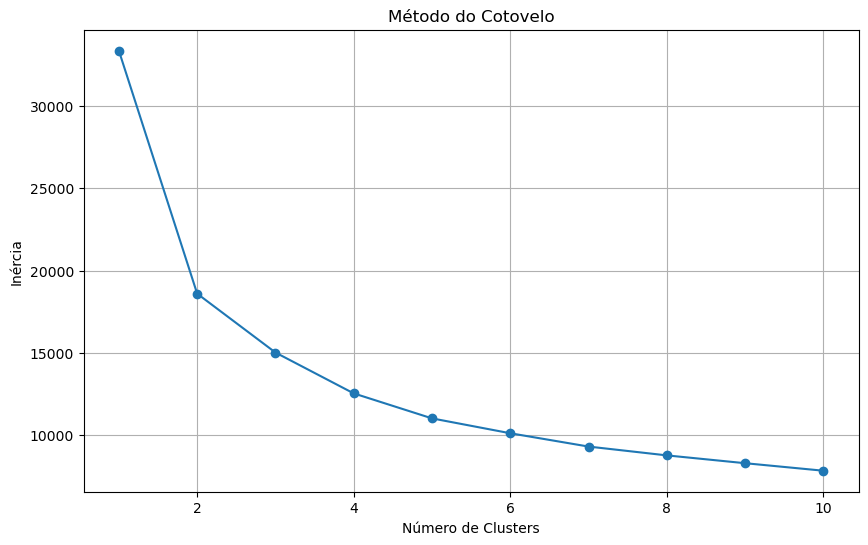

In [4]:
#%% Método do Cotovelo
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Definir n_init explicitamente
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()




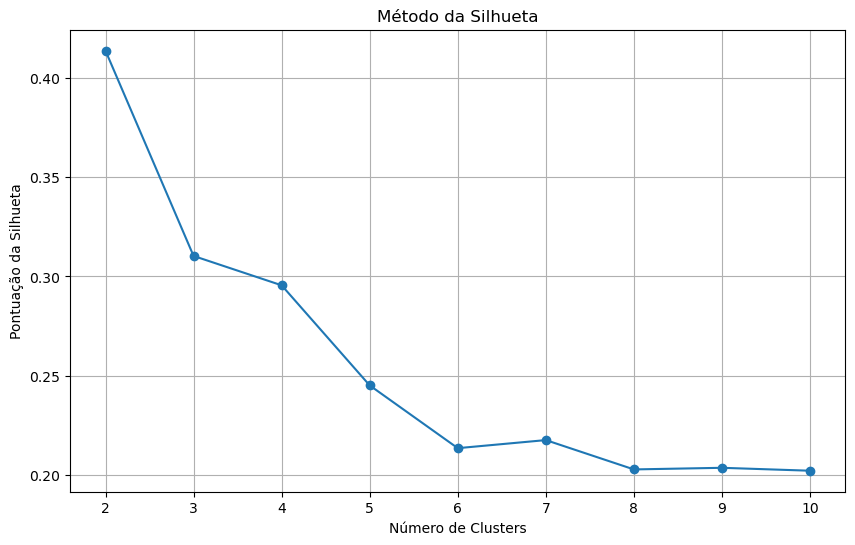

In [5]:
#%% Método da Silhueta
silhouette_scores = []
for k in k_range[1:]:  
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_normalized)
    score = silhouette_score(df_normalized, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.title('Método da Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.grid(True)
plt.show()


In [6]:
#%% Executar KMeans
n_clusters = 3 # Número de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_normalized)

#%% Exibir a quantidade de municípios em cada cluster
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)

2    2678
0    2018
1     860
Name: cluster, dtype: int64


In [7]:
# Analisar os centróides de cada cluster
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=cols)
print(centroids)

   pop_agua_encanada_2010  pop_banheiro_agua_2010  pop_coleta_lixo_2010  \
0               -0.127606               -0.164435              0.029590   
1               -1.488075               -1.772260             -1.323102   
2                0.575309                0.694566              0.403747   

   idhm_freq_escolar_2010  idhm_escolaridade_2010  atraso_ensino_fund_2010  
0               -0.483240               -0.504655                 0.402959  
1               -1.294586               -1.041534                 1.281343  
2                0.780960                0.715611                -0.716207  


In [8]:
# %%
cluster_profiles = df.groupby('cluster').agg({
    'pop_agua_encanada_2010': ['mean', 'std'],
    'pop_banheiro_agua_2010': ['mean', 'std'],
    'pop_coleta_lixo_2010': ['mean', 'std'],
    'idhm_freq_escolar_2010': ['mean', 'std'],
    'idhm_escolaridade_2010': ['mean', 'std'],
    'atraso_ensino_fund_2010': ['mean', 'std']
})
print(cluster_profiles)

        pop_agua_encanada_2010           pop_banheiro_agua_2010            \
                          mean       std                   mean       std   
cluster                                                                     
0                     0.837032  0.095904               0.773341  0.144217   
1                     0.636760  0.189586               0.424741  0.156925   
2                     0.940701  0.060281               0.959493  0.051930   

        pop_coleta_lixo_2010           idhm_freq_escolar_2010            \
                        mean       std                   mean       std   
cluster                                                                   
0                   0.944352  0.057516               0.621877  0.052760   
1                   0.799667  0.195752               0.543935  0.069740   
2                   0.984438  0.024831               0.743170  0.056931   

        idhm_escolaridade_2010           atraso_ensino_fund_2010            
         

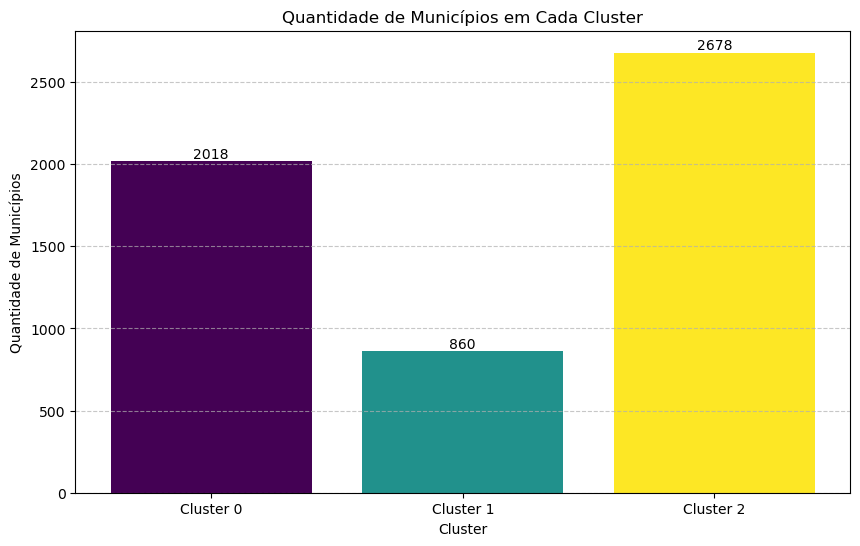

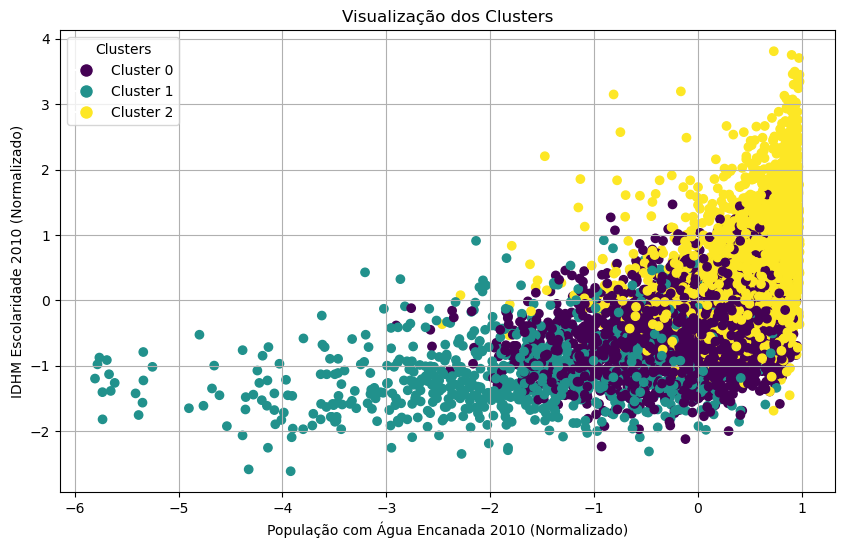

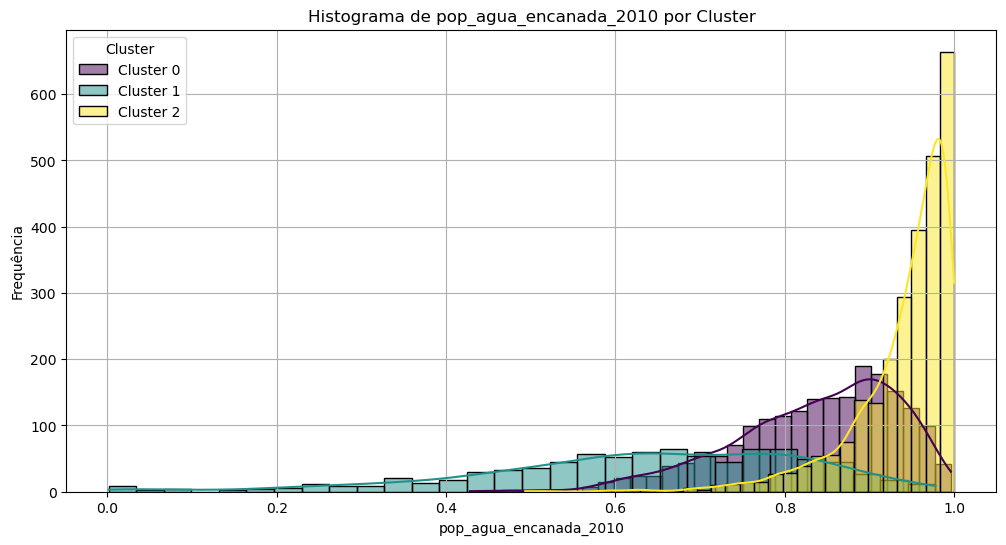

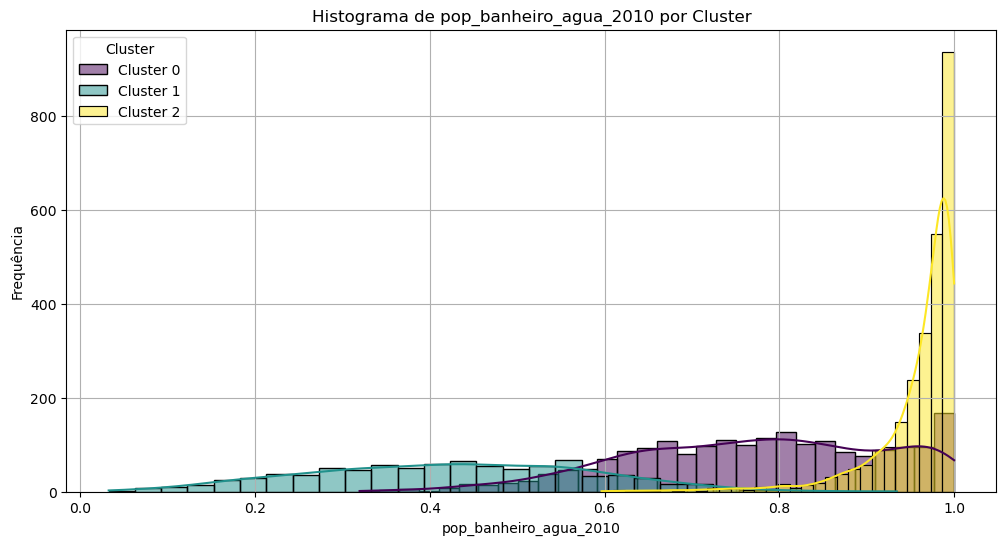

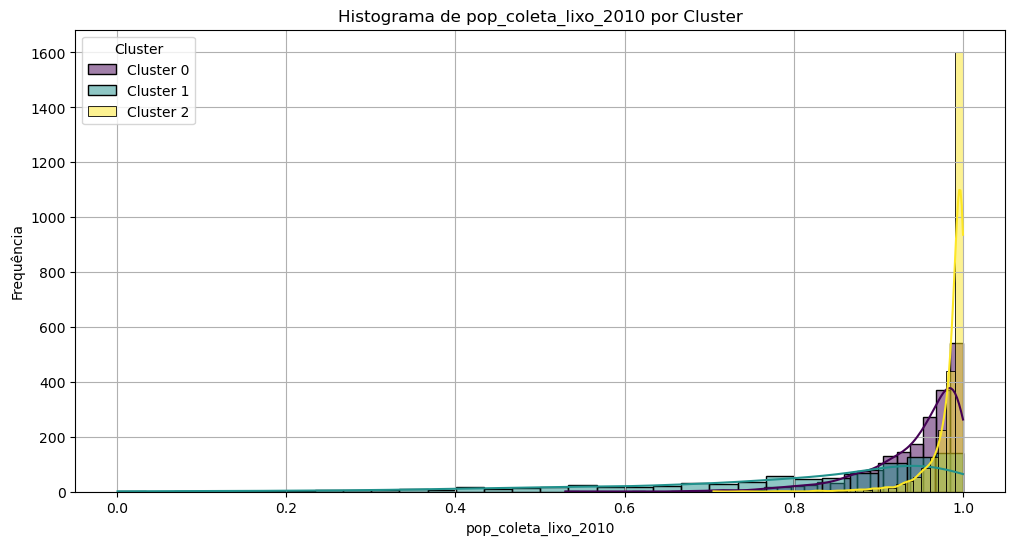

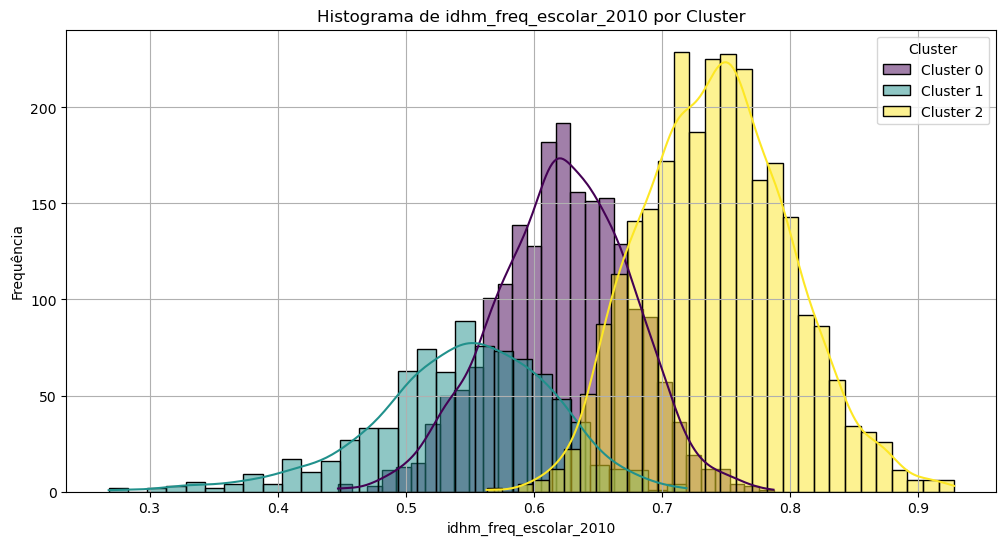

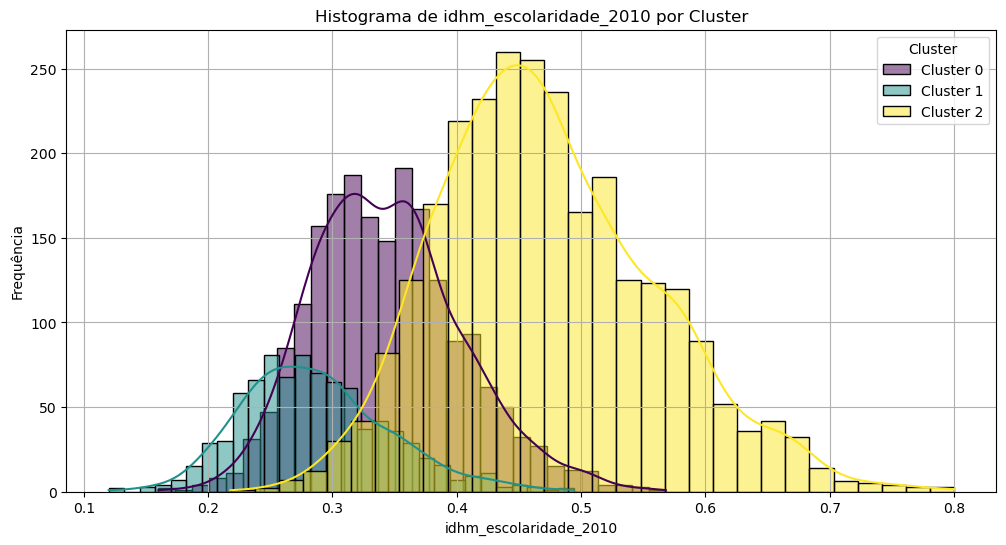

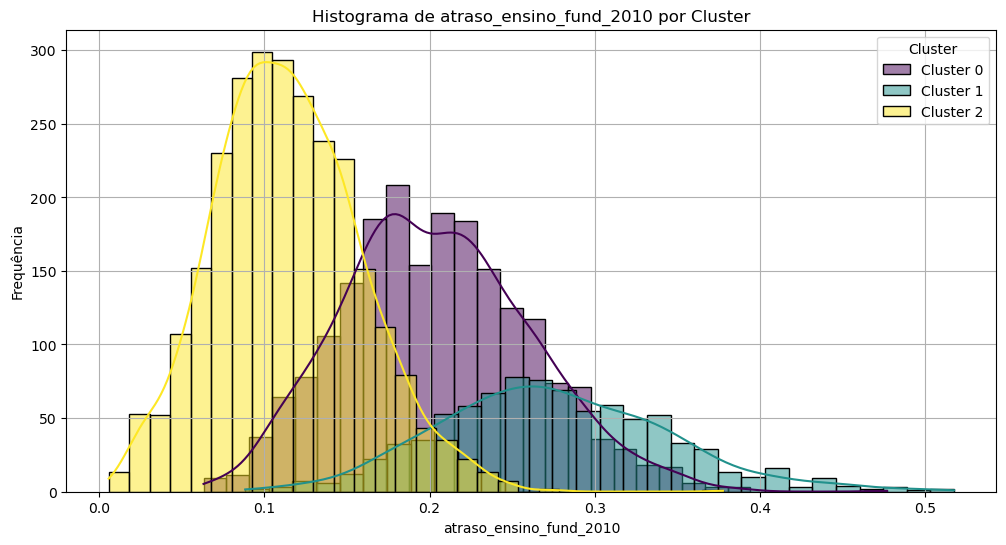

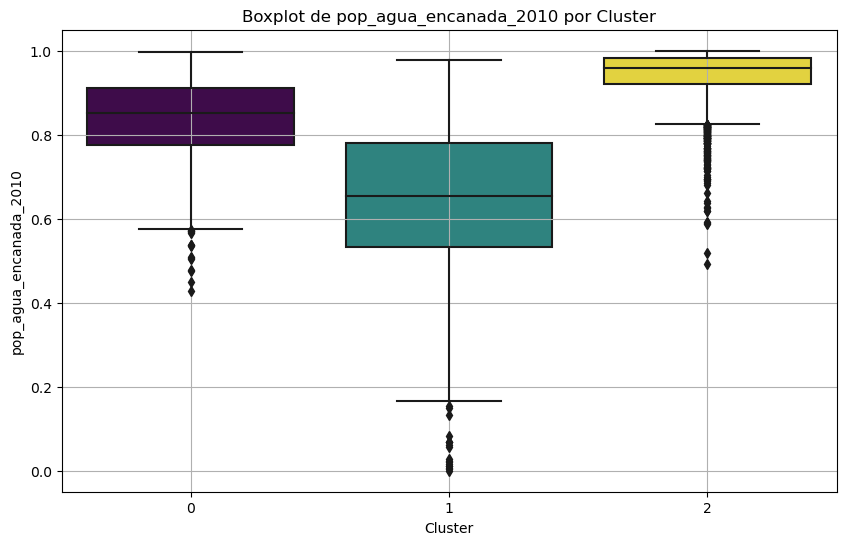

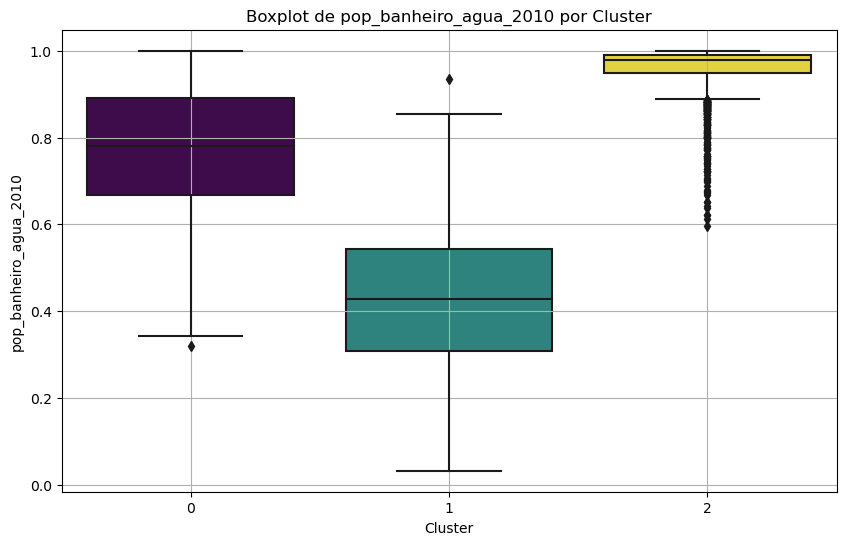

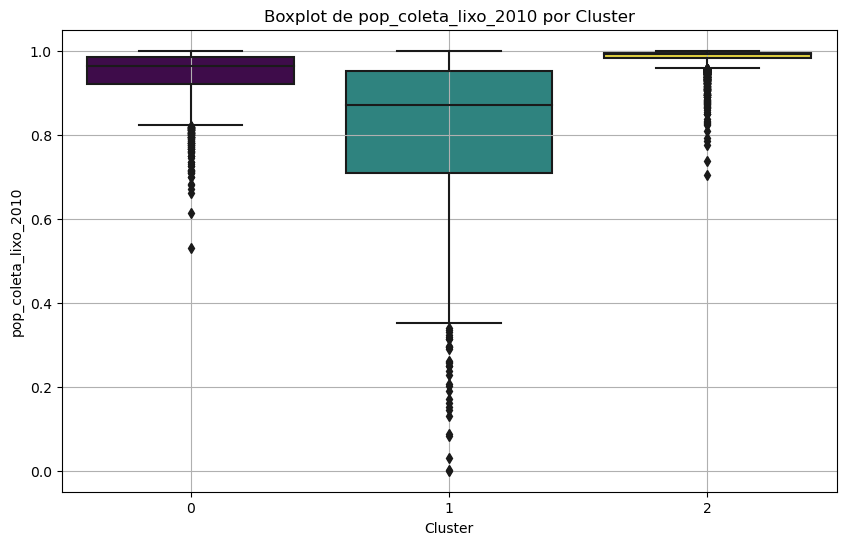

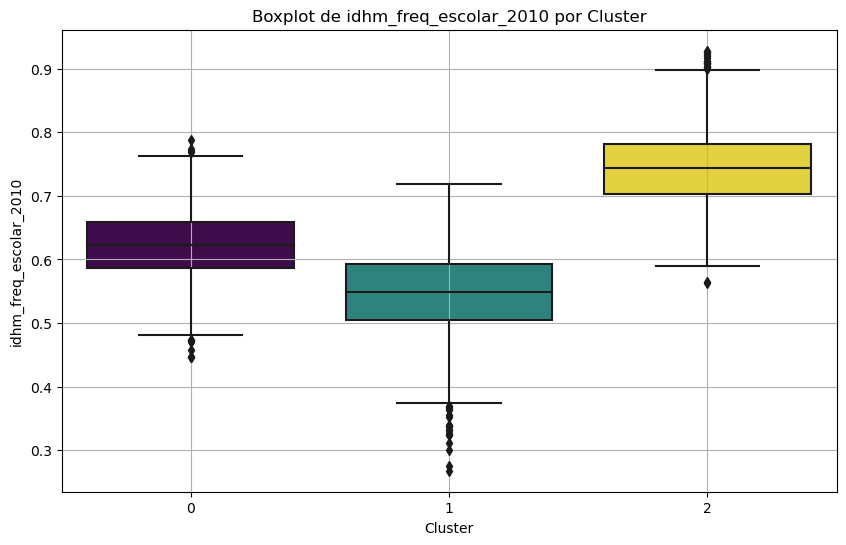

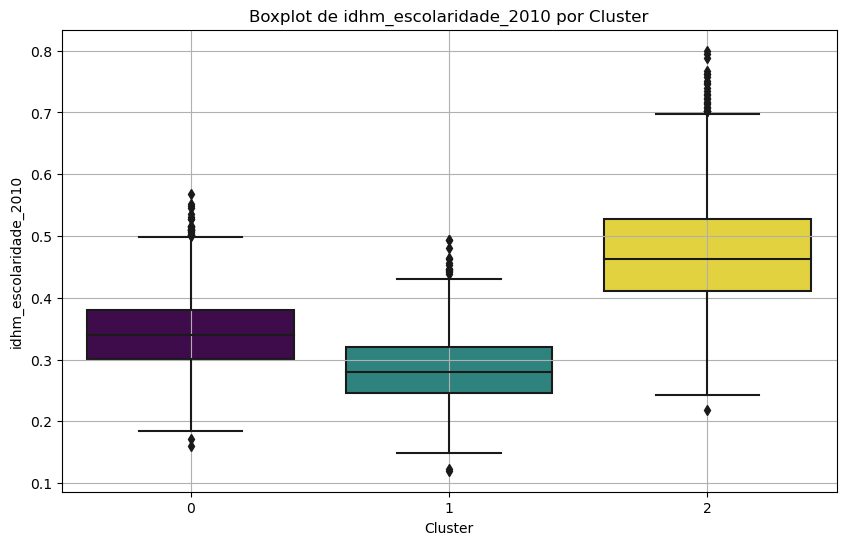

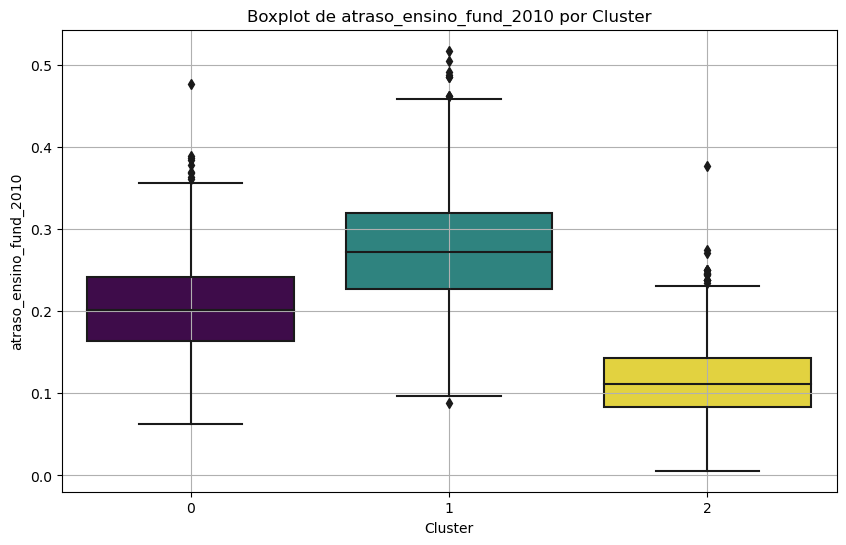

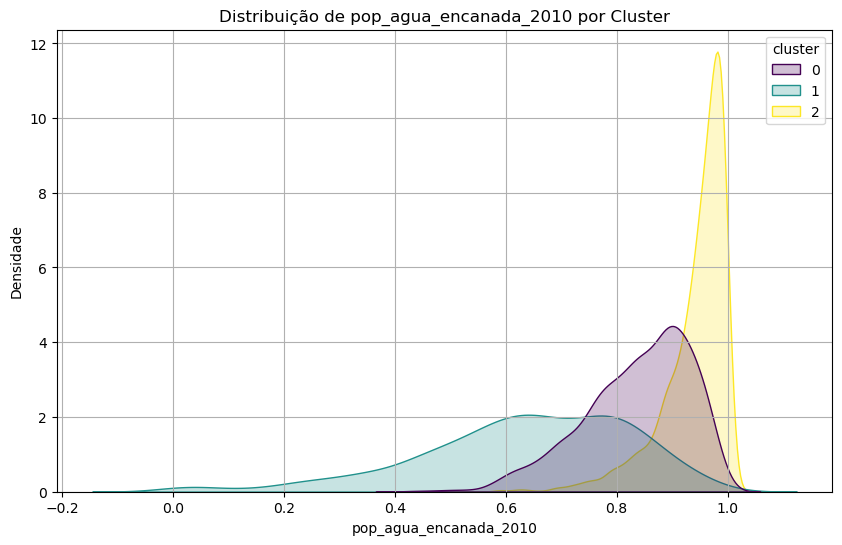

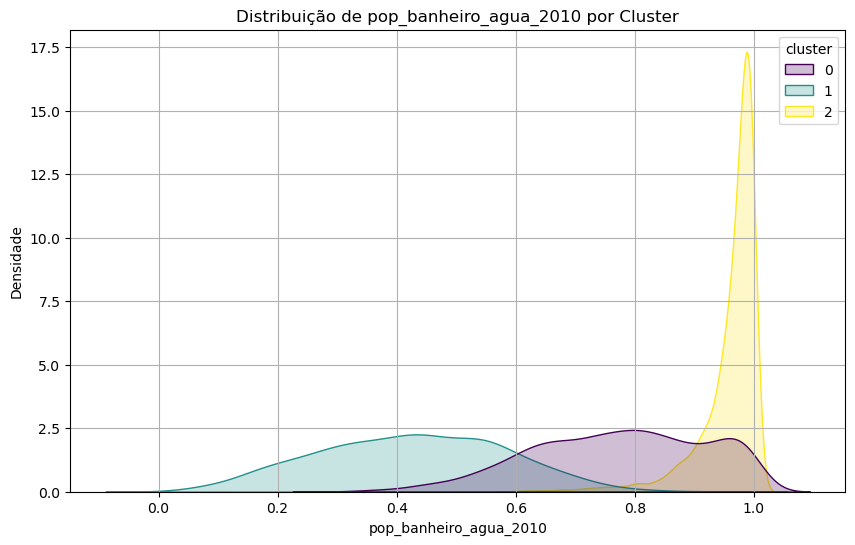

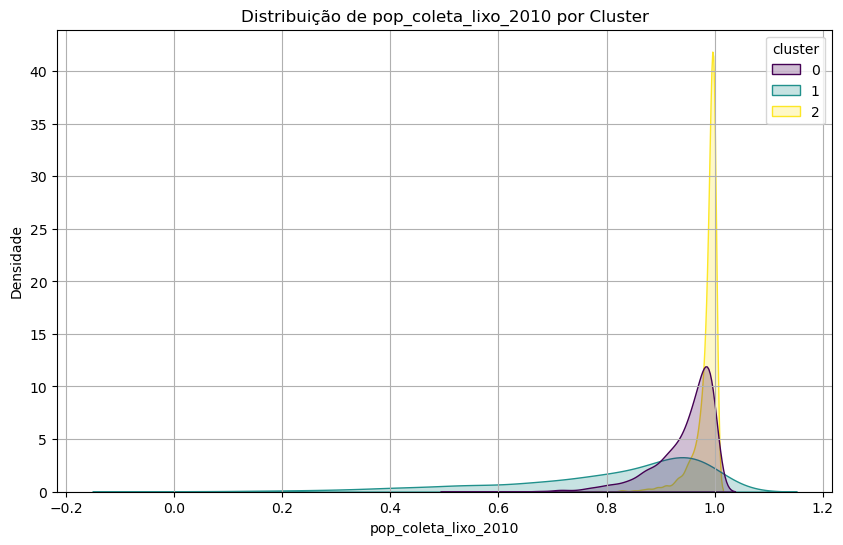

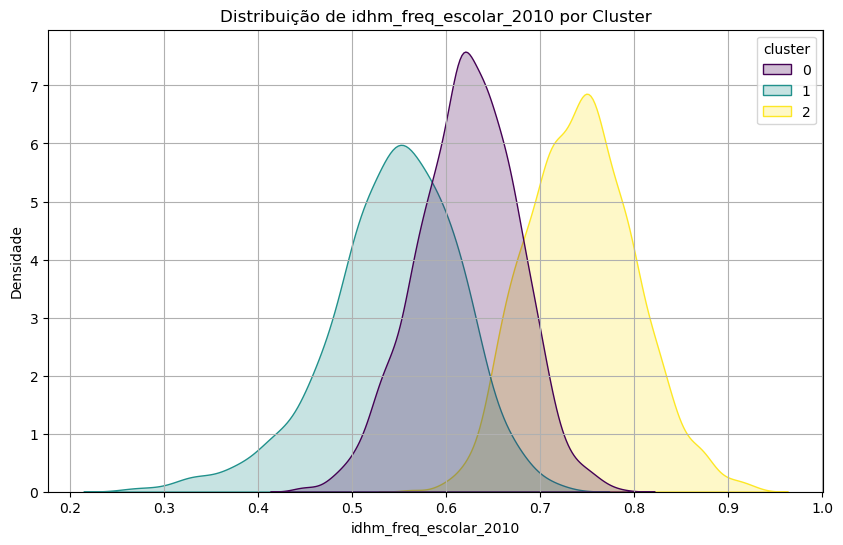

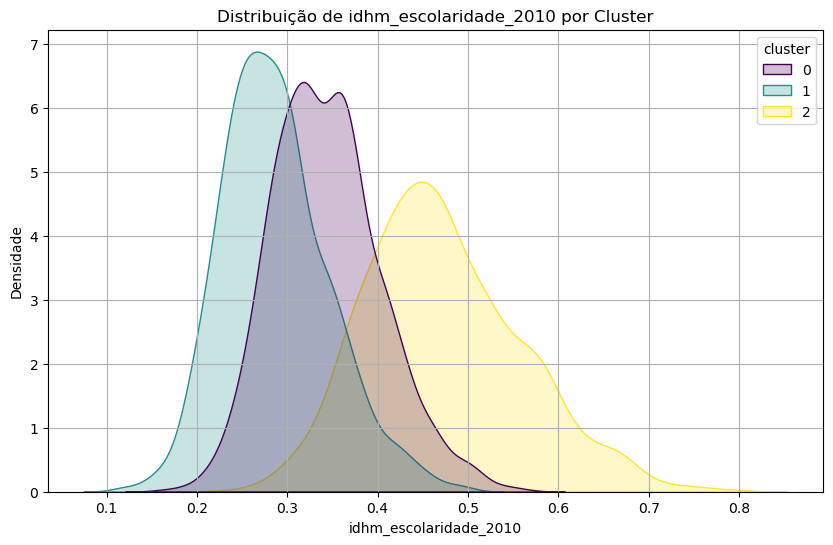

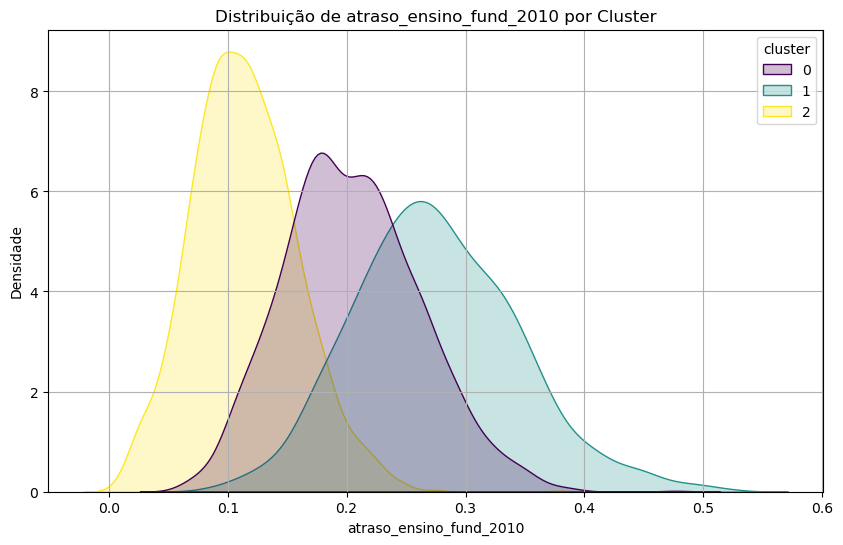

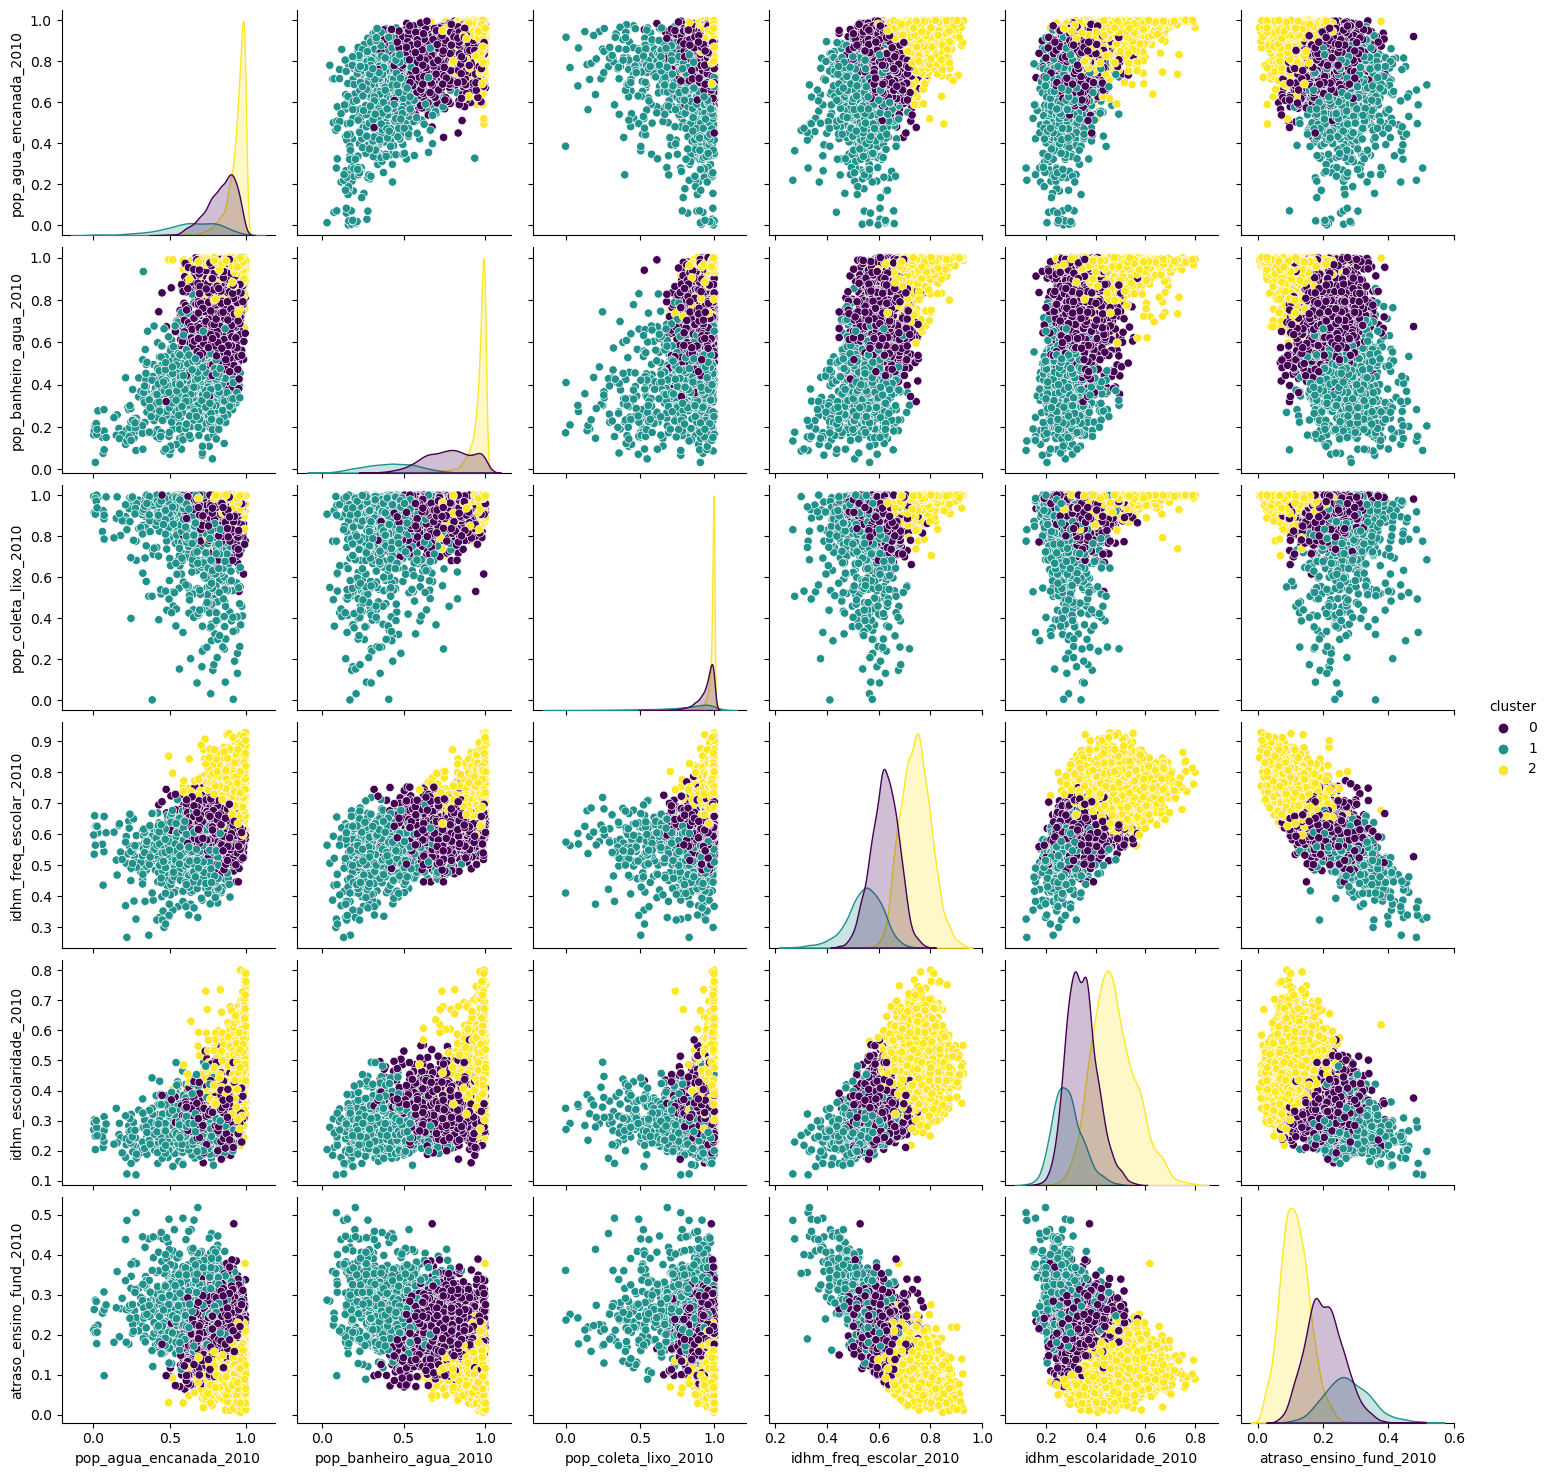

In [9]:
# Definir a ordem desejada dos clusters
desired_order = [0, 1, 2]

# Definir o número de clusters e as cores
clusters_presentes = np.unique(df['cluster'])
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(clusters_presentes)))
color_dict = {cluster: colors[i] for i, cluster in enumerate(clusters_presentes)}

# Mapear as cores para os clusters
cluster_colors = [color_dict[cluster] for cluster in cluster_counts.index]
cluster_counts = cluster_counts.loc[desired_order]
cluster_colors = [color_dict[i] for i in desired_order]  

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index, cluster_counts, color=cluster_colors)  
plt.title('Quantidade de Municípios em Cada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Quantidade de Municípios')
plt.xticks(ticks=range(len(cluster_counts)), labels=[f'Cluster {i}' for i in cluster_counts.index], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.show()

# Plotar os clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_normalized['pop_agua_encanada_2010'], 
                      df_normalized['idhm_escolaridade_2010'], 
                      c=df['cluster'], cmap='viridis')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[i], markersize=10) for i in clusters_presentes]
labels = [f'Cluster {i}' for i in clusters_presentes]
plt.legend(handles, labels, title='Clusters')

plt.title('Visualização dos Clusters')
plt.xlabel('População com Água Encanada 2010 (Normalizado)')
plt.ylabel('IDHM Escolaridade 2010 (Normalizado)')
plt.grid(True)

plt.show()

# Histogramas
for col in df_selected.columns:
    plt.figure(figsize=(12, 6))
    for cluster in clusters_presentes:
        subset = df_selected[df['cluster'] == cluster]
        sns.histplot(subset[col], kde=True, bins=30, label=f'Cluster {cluster}', color=color_dict[cluster])
        
    plt.title(f'Histograma de {col} por Cluster')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

# Boxplots
for col in df_selected.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=col, data=df, palette=color_dict)
    plt.title(f'Boxplot de {col} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

# Gráficos de densidade
for col in cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=col, hue='cluster', fill=True, common_norm=False, palette=color_dict)
    plt.title(f'Distribuição de {col} por Cluster')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.grid(True)
    plt.show()

# Gráfico de pares
sns.pairplot(df, hue='cluster', vars=cols, palette=color_dict)
plt.show()

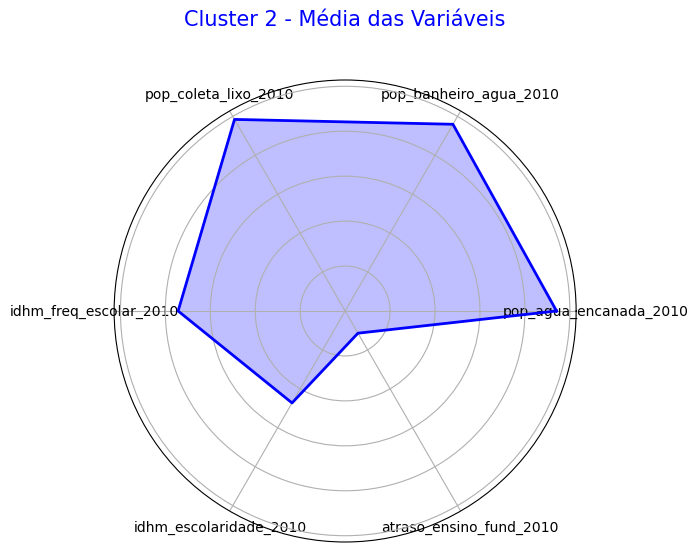

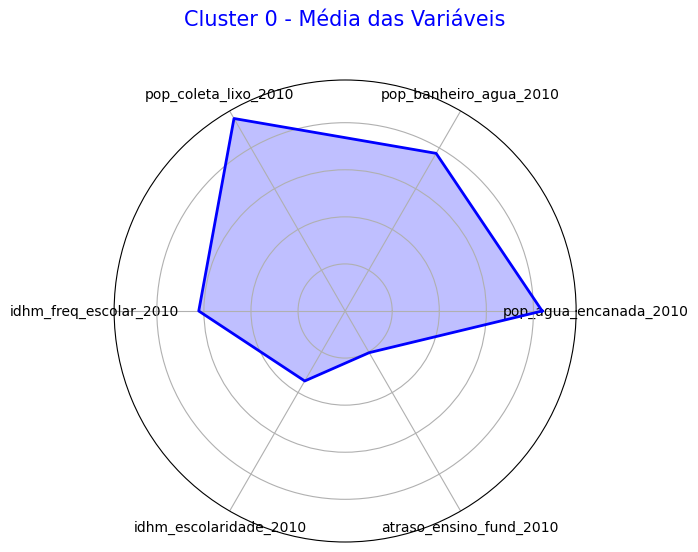

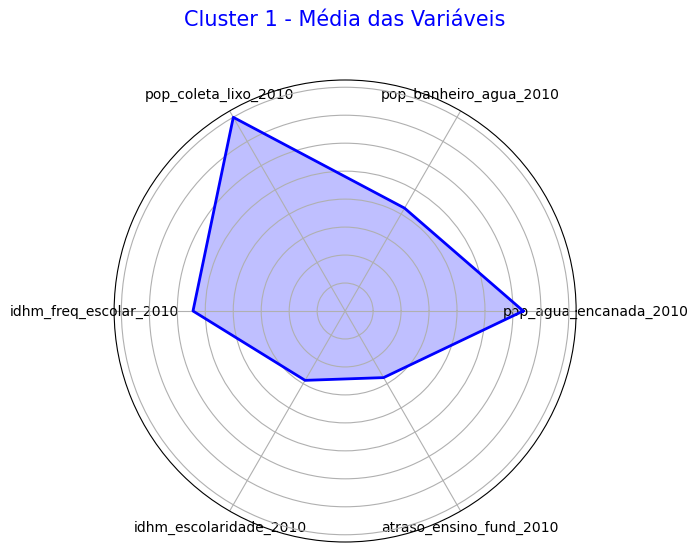

In [10]:
# Função para criar gráfico de radar
def radar_chart(data, labels, title):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    data = np.concatenate((data,[data[0]]))
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, data, color='blue', alpha=0.25)
    ax.plot(angles, data, color='blue', linewidth=2, linestyle='solid')
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.title(title, size=15, color='blue', y=1.1)
    plt.show()

# Criar gráfico de radar para cada cluster
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster][cols].mean()
    radar_chart(cluster_data, cols, f'Cluster {cluster} - Média das Variáveis')

In [11]:
# Função para calcular a correlação entre variáveis para cada cluster
def calculate_cluster_correlations(df, cols):
    correlation_by_cluster = {}
    for cluster in df['cluster'].unique():
        # Selecionar apenas as colunas numéricas antes de calcular a correlação
        cluster_data = df[df['cluster'] == cluster][cols].select_dtypes(include=[np.number])
        correlation_matrix = cluster_data.corr()
        correlation_by_cluster[cluster] = correlation_matrix
    return correlation_by_cluster

# Obter as correlações para cada cluster
correlation_by_cluster = calculate_cluster_correlations(df, cols)

for cluster, corr_matrix in correlation_by_cluster.items():
    print(f"\nCorrelação para Cluster {cluster}:")
    print(corr_matrix)


Correlação para Cluster 2:
                         pop_banheiro_agua_2010  pop_coleta_lixo_2010  \
pop_banheiro_agua_2010                 1.000000              0.422953   
pop_coleta_lixo_2010                   0.422953              1.000000   
idhm_freq_escolar_2010                 0.269970              0.157215   
idhm_escolaridade_2010                 0.070540              0.148229   
atraso_ensino_fund_2010               -0.094838             -0.094991   

                         idhm_freq_escolar_2010  idhm_escolaridade_2010  \
pop_banheiro_agua_2010                 0.269970                0.070540   
pop_coleta_lixo_2010                   0.157215                0.148229   
idhm_freq_escolar_2010                 1.000000                0.081692   
idhm_escolaridade_2010                 0.081692                1.000000   
atraso_ensino_fund_2010               -0.527820                0.060056   

                         atraso_ensino_fund_2010  
pop_banheiro_agua_2010         

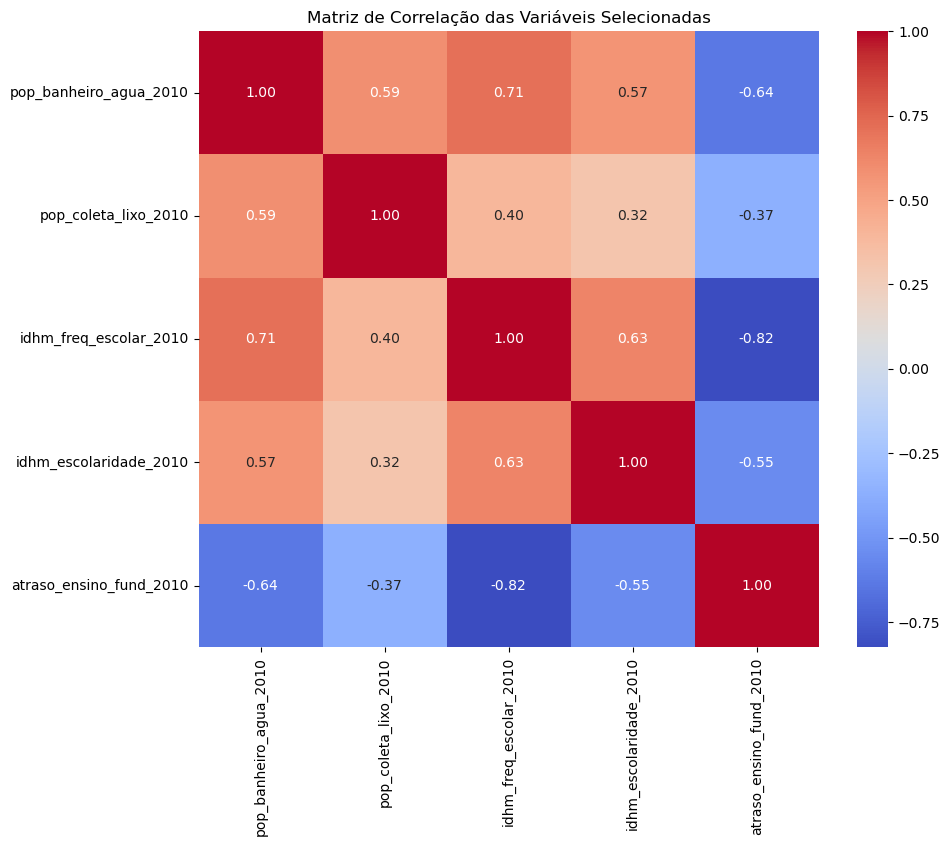

In [12]:
# Heatmap da correlação para o DataFrame completo
correlation_matrix = df[cols].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Variáveis Selecionadas')
plt.show()


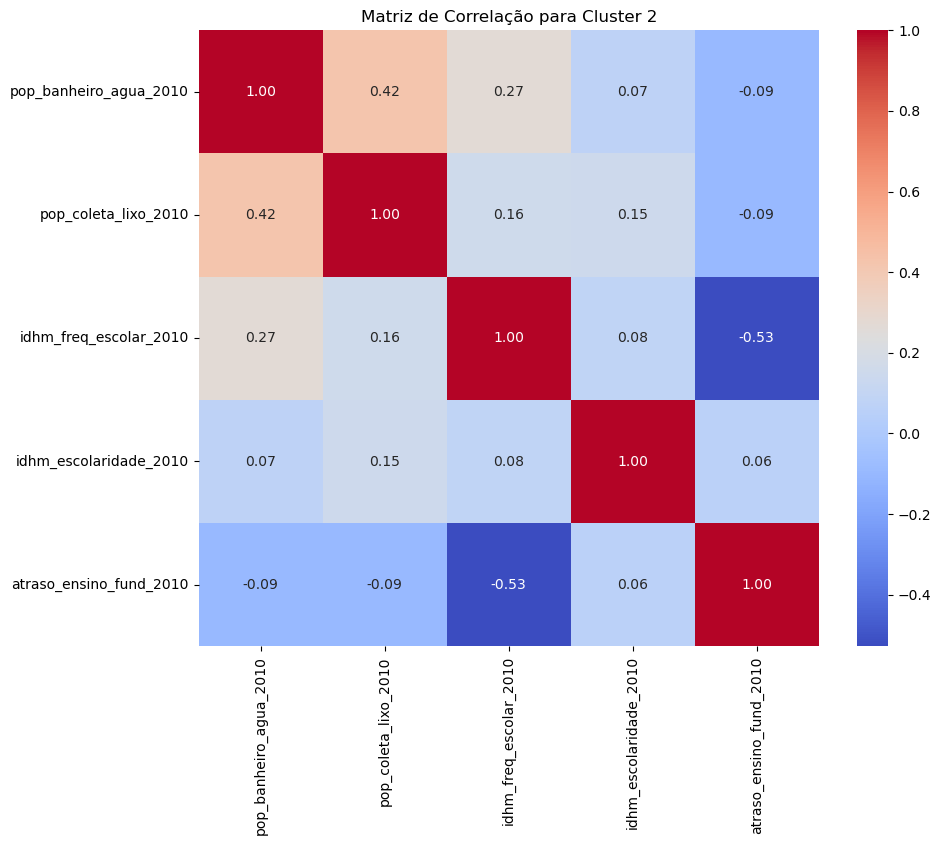

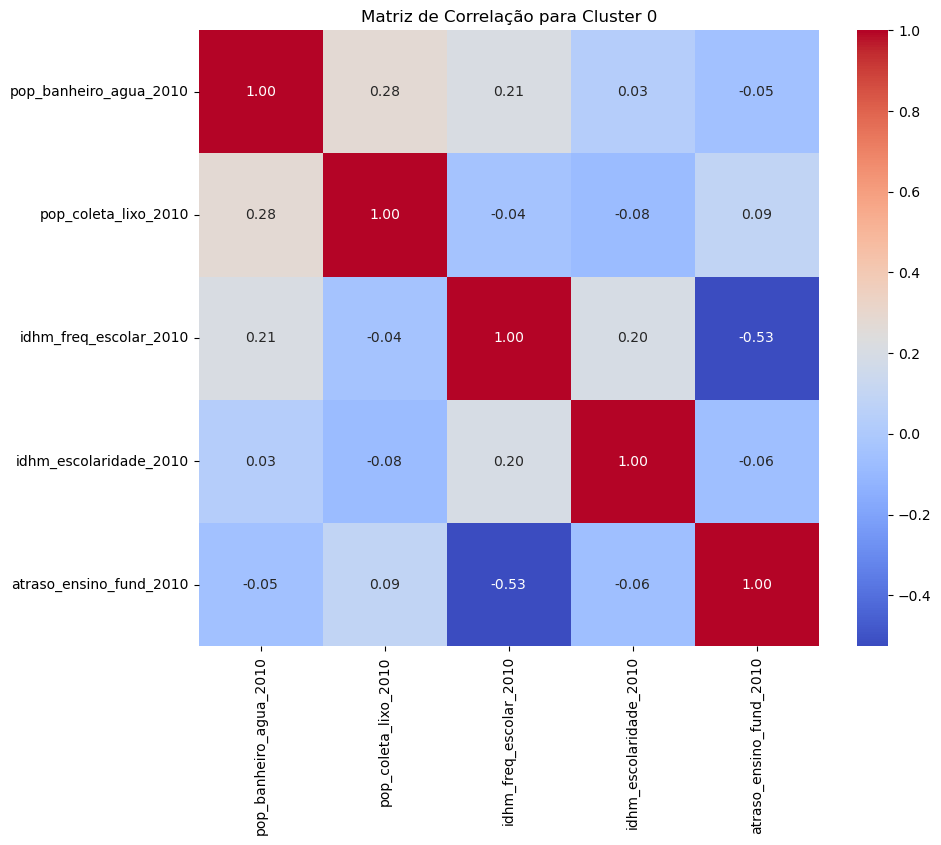

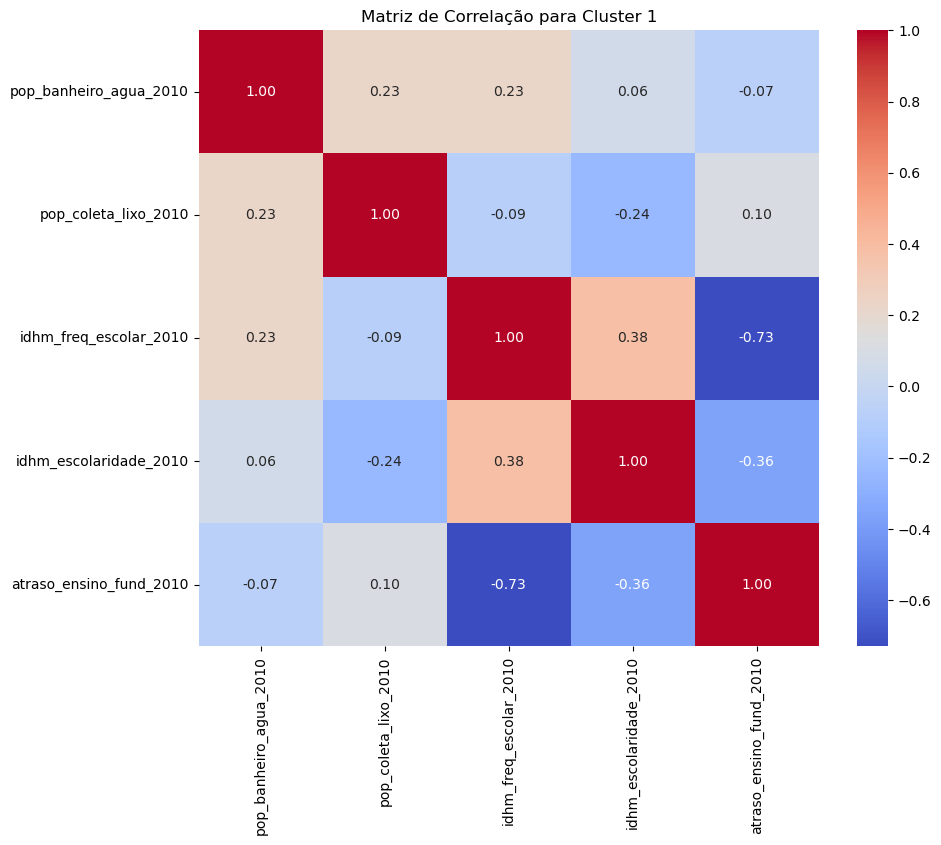

In [13]:
# Heatmaps das correlações por cluster
for cluster in df['cluster'].unique():
    plt.figure(figsize=(10, 8))
    cluster_data = df[df['cluster'] == cluster][cols]
    
    # Calcula a matriz de correlação apenas para colunas numéricas
    correlation_matrix = cluster_data.corr(numeric_only=True)
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlação para Cluster {cluster}')
    plt.show()


In [14]:
#%% Gráfico 3D interativo com Plotly
fig = px.scatter_3d(
    df, 
    x='pop_agua_encanada_2010',  # Saneamento
    y='idhm_escolaridade_2010',   # Escolaridade
    z='renda_media_4quinto_2010',          # Renda
    color='cluster',              
    hover_name='municipio',       
    labels={
        'pop_agua_encanada_2010': 'População com Água Encanada 2010',
        'idhm_escolaridade_2010': 'IDHM Escolaridade 2010',
        'renda_media_4quinto_2010': 'Renda média do Quarto quinto da população 2010'
    },
    title='Relação entre Saneamento, Escolaridade e Renda (Clusters)',
    color_continuous_scale='Viridis',  
    template='plotly_white',  
    height=1000,  
    width=1500   
)

fig.show()